# Física Nuclear y de Partículas #

## Tema 6. Reacciones nucleares.  ##


César Fernández Ramírez\
Departamento de Física Interdisciplinar\
Universidad Nacional de Eduación a Distancia

Versión: Octubre 2024

Contenidos:

- Sección eficaz de Rutherford
- Fisión

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import pandas as pd
import matplotlib.ticker as ticker

jpac_blue   = "#1F77B4"; jpac_red    = "#D61D28";
jpac_green  = "#2CA02C"; jpac_orange = "#FF7F0E";
jpac_purple = "#9467BD"; jpac_brown  = "#8C564B";
jpac_pink   = "#E377C2"; jpac_gold   = "#BCBD22";
jpac_aqua   = "#17BECF"; jpac_grey   = "#7F7F7F";

jpac_color = [jpac_blue, jpac_red, jpac_green, 
              jpac_orange, jpac_purple, jpac_brown,
              jpac_pink, jpac_gold, jpac_aqua, jpac_grey, 'black' ];

jpac_axes = jpac_color[10]
dashes = 60*'-'

# the service URL
livechart = "https://nds.iaea.org/relnsd/v1/data?"

# There have been cases in which the service returns an HTTP Error 403: Forbidden
# use this workaround
import urllib.request
def lc_pd_dataframe(url):
    req = urllib.request.Request(url)
    req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
    return pd.read_csv(urllib.request.urlopen(req))

df = lc_pd_dataframe(livechart + "fields=ground_states&nuclides=all")
df = df[pd.to_numeric(df['binding'],errors='coerce').notna()]
df['binding'] /= 1000
df['A'] = df['n'] + df['z']

uma = 931.4941024/1000000/1000


Sección eficaz de Rutherford

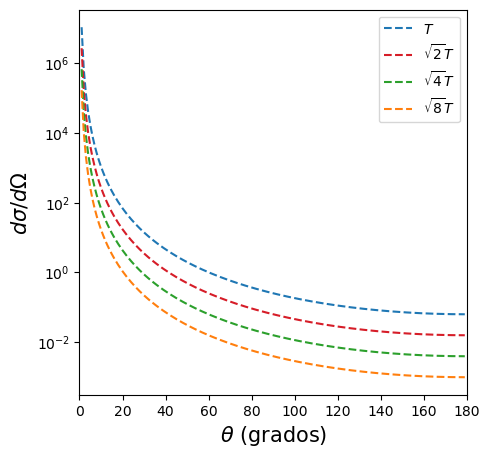

In [2]:
def rutherford(d0,theta):
    return d0*d0/16/(np.sin(theta/2))**4

th = np.arange(1,180,1)
thrad = th*np.pi/180

fig = plt.figure(figsize=(5,5))
plt.xlim((0,180))
plt.yscale('log')
#plt.ylim((0.,0.2))
plt.ylabel(r'$d \sigma/d\Omega$ ',fontsize=15)
plt.xlabel(r'$\theta$ (grados)',fontsize=15)
d0 = 1; plt.plot(th,rutherford(d0,thrad),'--',c=jpac_color[0],label=r'$T$')
d0 = 0.5; plt.plot(th,rutherford(d0,thrad),'--',c=jpac_color[1],label=r'$\sqrt{2}T$')
d0 = 0.25; plt.plot(th,rutherford(d0,thrad),'--',c=jpac_color[2],label=r'$\sqrt{4}T$')
d0 = 0.125; plt.plot(th,rutherford(d0,thrad),'--',c=jpac_color[3],label=r'$\sqrt{8}T$')
plt.legend(loc='upper right',ncol=1,frameon=True)
plt.show()
#fig.savefig("Rutherford.pdf", bbox_inches='tight')


Fisión

In [3]:
U238 = df.loc[ ((df['symbol']=='U') & (df['A']==238))] 
U235 = df.loc[ ((df['symbol']=='U') & (df['A']==235))] 

In [4]:
print('Abundancia del U-235',U235['abundance'].values[0],'%')
print('Modo de desintegración principal',U235['decay_1'].values[0])
print('Modo de desintegración secundario',U235['decay_2'].values[0])

print('Abundancia del U-238',U238['abundance'].values[0],'%')
print('Modo de desintegración principal',U238['decay_1'].values[0])
print('Modo de desintegración secundario',U238['decay_2'].values[0])

#print(U238.transpose())

Abundancia del U-235 0.7204 %
Modo de desintegración principal A
Modo de desintegración secundario SF
Abundancia del U-238 99.2742 %
Modo de desintegración principal A
Modo de desintegración secundario SF


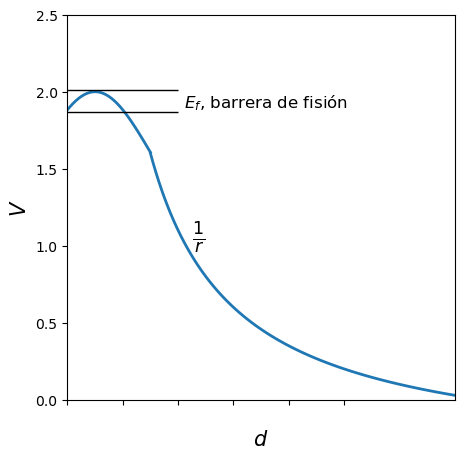

In [5]:
def coulomb(a,B,r):
    return a*B/r

def campana(c,mu,sigma,r):
    return c + np.exp(-((r-mu)**2)/(2*sigma**2))

a, alim = 3, 15
B, V0 = 2, -3
rg = np.arange(0,a+0.1,0.1)
rc = np.arange(a,alim,0.1)
fig = plt.figure(figsize=(5,5))
r = np.arange(0.,10.,0.1)
plt.ylabel(r'$V$',fontsize=15)
plt.xlabel(r'$d$',fontsize=15)
plt.xlim((0.,alim-1))
plt.ylim((0,2.5))
plt.plot(rc,coulomb(a,B,rc)-0.4,'-',c=jpac_color[0],lw=2.)
plt.plot(rg,campana(coulomb(a,B,a)-0.6,a/3,2,rg)-0.4,'-',c=jpac_color[0],lw=2.)
plt.hlines(1.87,0.,4,colors=jpac_color[10], lw=1., linestyles='solid')
plt.hlines(2.01,0.,4,colors=jpac_color[10], lw=1., linestyles='solid')
plt.text(4.2,1.9,r'$E_f$, barrera de fisión',c=jpac_color[10],fontsize=12)
plt.text(4.5,1,r'$\frac{1}{r}$',c=jpac_color[10],fontsize=18)
plt.xticks([0,2,4,6,8,10],[' ',' ',' ',' ',' ',' '])
plt.show() 
#fig.savefig('fision.pdf', bbox_inches='tight')    